### Pandas(Python Data Analysis Library)

pandas는 파이썬에서 사용하는 데아터 분석 라이브러리로 행과 열로 이루어진 데이터 객체를 다룰
수 있게 되며 보다 안정적으로 대용량의 데이터를 처리하는데 유용하다.
pandas에서는 기본적으로 정의되어 있는 1차원 배열인 `series`와 2차원 배열인 `DataFrame`을
사용한다.

pandas의 자료구조들은 빅데이터 분석에 있어 높은 수준의 성능을 보여준다.]

##### 참고site

* pandas문서 : http://pandas.pydata.org/pandas-docs/stable/index.html
* 자료구조 : http://pandas.pydata.org/pandas-docs/stable/dsintro.html

In [13]:
# 데이터분석 주요라이브러리
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 한글처리
from matplotlib import rc, font_manager
font_manager = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_manager)
rc('axes', unicode_minus = False)

#### 1. Series 

In [ ]:
# 1. Series 자료생성(1) - 기본
# 인덱스와 값을 가지는 1차원 배열
# 만드는 방법은 값들의 리스트를 전달해서 생성한다. 인덱스는 자동으로
# 기본정의 되는 정수인덱스를 사용한다. 단, 인덱스를 정의하지 않으면
# 0부터 순번으로 부여된다.

ser1 = pd.Series([1,2,3,4,5,6,7])
print(ser1)
ser1.plot()

In [ ]:
# 2. Series 자료생성(2) - 인덱스 정의
# 기본숫자인덱스 vs 문자인덱스
ser2 = pd.Series([3,6,9,12])
print(ser2)

ser3 = pd.Series([3,6,9,12], index = [2016,2017,2018,2019])
print(ser3)
print(ser3[2017])
ser3.plot()
plt.show()
# plt.show()를 하지 않아도 시스템이 그래프를 보여주긴함
# 중복해서 하면 마지막만 호출됨으로 show로 호출해야함
ser3.plot(kind = 'bar')
plt.show()

In [ ]:
# 3. Series 자료생성(3) - 키(인덱스), 값으로 정의
# dictionary자료형으로 생성해야 한다.
employee = {'홍길동':5400, '손흥민':9000, '홍길순':6000,'홍길자':4000}
ser4 = pd.Series(employee)
print(ser4)
ser4.plot(kind='bar')
plt.show()

#### 2. DataFrame

In [ ]:
# 1. DataFrame자료생성(1) - 리스트자료형으로 DF을 생성
# 테이블형식의 2차원배열(정확하게는 Matrix)
df = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]])
print(df)

# l = [[1,2,3],[4,5,6],[7,8,9]]
# l.plot() : 리스트형이기 때문에 plot이라는 함수가 없음 -> Series 사용



In [ ]:
# 2. DataFrame자료생성(2) - 딕셔너리자료형으로 DF을 생성
tbl = pd.DataFrame({
    '체중' : [80,70,90,60,50],
    '신장' : [180,170,190,160,168],
    '성별' :['F','M','F','M','F']    
}, index =['소향','손흥민','홍길순','홍길동','홍길자'])

tbl

In [ ]:
# 손흥민의 신장?
# 접근방법 df[열이름] or df.열이름
print(tbl['신장']['손흥민'])
print(tbl.신장['손흥민'])
print(tbl.신장.손흥민)
print(tbl['신장'] == 170)

In [ ]:
# 실습

# 1. 성별이 남자인 사람만 출력
print(tbl[tbl['성별'] == 'M'])

# 2. 신장이 170이상인 사람만 출력
print(tbl[tbl.신장 > 170])

# 3. tbl을 시각화()

tbl.plot()
plt.show()
tbl.plot(kind = 'bar')
plt.show()
tbl.plot(kind = 'kde') # 분포도를 그려주는 함수
plt.show()
tbl.plot(kind = 'barh')# 수평 바그래프
plt.show()

In [ ]:
# 3. DataFrame자료생성(3) - numpy배열로 DF을 생성

In [ ]:
# ?pd.date_range(start, end, freq...) 일정기간 날짜 데이터를 만들어주는 함수
# a = pd.date_range('20200101','20200331', freq='M')
datas = pd.date_range('20200101',periods=6, freq='M')
df = pd.DataFrame(np.random.randn(6,4),index =datas,columns=list('ABCD'))
df

data = {
    'names': ['소향','손흥민','홍길순','홍길동','홍길자'],
    'year' : [2015,2016,2017,2018,2019],
    'points' :[1.5,1.7,2.6,3.6,2.9]
}
df = pd.DataFrame(data, index = pd.date_range('20191201',periods=5))
df

In [ ]:
# describe vs describe()
print(df.describe) # 생성된 DF의 속성을 출력
print(df.describe())  # 기초수리통계의 수치를 출력

In [ ]:
# df의 값만 출력
print(df.values)
print(type(df.values))

In [ ]:
# 4. DataFrame자료생성(4) - 직접 인덱스와 컬럼을 지정해서 생성
# NaN
print(data)
df = pd.DataFrame(data,
                  columns=['names','year','points','penalty'], # 컬럼명 정의 및 추가
                  index=['JAN','FEB','MAR','APR','MAY'])
df

In [ ]:
# 인덱스, 컬럼, 값을 출력
print(df.index)
print(df.columns)
print(df.values)

# 특정컬럼만 출력
print(df.year)
print(df['names'])

In [ ]:
# 2개이상의 값을 출력 즉, 년도와 이름만 출력
# 컬럼을 다수 출력할 시 [[]]처럼 대괄호를 두개를 사용한다.
# [][] or df.col.index는 컬럼을 선택한 뒤 특정 인덱스를 호출하는데 사용한다.
df[['names','year']]

In [ ]:
# 특정열의 값을 변경하기
# NaN(결측치)인 값을 특정값으로 변경
# df['컬럼명'] = value or df.컬럼명 = value
df.penalty = 1.7

# 이 방식은 원래 column명이 2차원이상일 경우 컬럼을 구분하기 위해서 사용하는 방법이다.,
# 이 경우는 컬럼이 1차원이기 때문에 index를 호출하는 거라고 생각됨
# 전부 에러는 뜨는데 사용은 가능
df.penalty.JAN = 1.8
df['penalty']['MAR'] = 1.6

df

In [ ]:
# 1. 컬럼추가(1) : 컬럼이 없을 경우에 자동으로 추가하기
df['addvalue1'] = 2.7
df

In [ ]:
df['age'] = np.arange(10, 15)
df

In [ ]:
# 3. 컬럼삭제하기 
# df.drop(columns = [col1, col2...],row = [], axis ) 
df = df.drop(['age'], 1)
df

In [ ]:
# 4. 컬럼삭제하기 - del명령어
del df['age']
df

In [ ]:
# 인덱스변경
df = pd.DataFrame(data, index = ['MON','THU','WED','THR','FRI'])
df

In [ ]:
# df에서 슬라이싱과 인덱싱
# 인덱스명으로도 접근할 수 있고, 숫자인덱스로도 접근이 가능
df[0:2]
df['MON':'THU']

#### 3. Pandas 기본함수
* csv파일 load/save
 - df = pd.read_csv('../data/file.csv')
 - df.to_csv('../data/file.csv')
* DataFrame의 데이터 확인
 - df.shape()
 - df.info()
 - df.columns()
 - df.dtypes()
 - df.head(n) : 앞에서 n이 지정이 않되면 5건, 지정되면 지정건수
 - df.tail(n) : 끝에서 n, defualt 5
* null갯수확인
 - df.isnull().sum()
* 특정 컬럼/행을 삭제
 - df = df.drop([컬럼명], axis = 컬럼, 인덱스 조정) 1 = 열
 - df = df.drop([인덱스명], axis = 0) 0 = 행
* 특정컬럼이름 변경
 - df = df.rename(columns = {'변경전 컬럼명' :'변경후 컬럼명'}) 
* 특정컬럼의 값을 새로운 컬럼으로 만들기
 - df['A'] = df['B'].str[:5] : 왼쪽에서 5개 문자열을 복사
* 컬럼의 순서 변경
 - df = pd.DataFrame(df, columns = ['C','B','A']) - abc -> cba
* 데이터프레임 조인
 - df_result = pd.concat([df1, df2])
* 데이터프레임 중복확인, 제거
 - df.duplicated() : 중복확인
 - df.drop_duplicates() : 중복제거
* df의 행, 열의 위치로 접근
 - df.loc[]
 - df.iloc[]

In [ ]:
# 1. head() 앞에서 5행, tail() 뒤에서 5행, 숫자지정되어 있다면 지정 만큼
print(df.head(1))
print(df.tail(1))

In [ ]:
# 2 .loc() : df에서 열이나 행을 선택하는 함수
# 숫자인덱스사용은 불가, 행, 열의 이름으로 접근
# 한행만 선택했을 경우에는 text형태로, 2개 이상인 경우 table로 출력
# 행열의 이름이 숫자형이면 숫자형으로 입력해야함
df = pd.DataFrame(data, index = [1,2,3,4,5])
df.loc[2:4] # 인덱스가 1인 것만 출력
# df.loc[0] # 숫자인덱스 사용불가

# 복잡한 loc
# 전체행 중 year, names만 선택

df.loc[1:2,['year','names']]

In [ ]:
# 3. iloc() : 숫자인덱스로 접근 가능
df.iloc[3]

# 행과 열범위을 지정해서 출력
df.iloc[1:3,]

# 콜론 없이 출력
print(df)
print()
print(df.iloc[0:1,1]) # x,y위치

In [ ]:
# bool인덱스 : 조건이 일치하는 행만 출력하기
# 2016보다 큰 자료만 출력
# df['year'] - pandas.core.series 인트형
df[df['year'] > 2016]
df[df.year > 2016]

In [ ]:
# 행삭제
# index가 날짜형태로 된 자료를 삭제할 경우에는 날짜형태의 문자를 날짜 자료형으로 변경후
# 삭제
df = pd.DataFrame(np.random.rand(6,4))
df.columns = ['A','B','C','D']
df.index = pd.date_range('20200101', periods=6)
df

In [ ]:
# 열삭제
del df['D']
df

# 여러컬럼 삭제 

In [ ]:
df = df.drop(['B','C'],1)
df

In [ ]:
print(type(df.index)) # DatetimeIndex

# pd.to_datetime('20200103') Timestamp
# df = df.drop(['20200103','20200105']) # Typeerror
df = df.drop([pd.to_datetime('20200103'),pd.to_datetime('20200105')])
df

#### 4. Pandas의 데이터분석용 함수
* sum()
* mean()
* var()
* T : 피벗기능
* groupby()
* agg()

In [ ]:
df = pd.DataFrame({
    'weight':[80.0,70.4,65.5,45.9,51.5],
    'height':[170,180,155,143,154]
})

In [ ]:
# 1. sum()
# 세로방향 : 기본값, axis = 0
# 가로방향 : axis = 1
print(df.sum(1))
print(df.sum())

In [ ]:
# 2. mean()
# 세로방향 : 기본값, axis = 0
# 가로방향 : axis = 1
print(df.mean())
print(df.mean(1))
print('신장의 평균 = ',df.height.mean())

In [ ]:
# 3. var()
a = [10,20,30,40,50]
b = [10,30,30,30,50]

df_a = pd.DataFrame(a)
df_b = pd.DataFrame(b)
print(df_a.mean())
print(df_b.mean())
print(df_a.var())
print(df_b.var())



In [ ]:
# 4. pivot()

#### 5. Pandas를 이용한 데이터 분석(csv파일)

* csv파일 load/save
 - df = pd.read_csv('../data/file.csv')
 - df.to_csv('../data/file.csv')

In [ ]:
input_file = '../data/input.csv'
output_file = '../data/output.csv'
print(input_file)

In [ ]:
# 1. csv파일 읽기(1) : 파이썬문법으로만 사용하기
# newline='' : 개행문자('\n')를 무시하고 읽기, 
# 이 옵션이 없으면 빈라인이 추가된다.
with open(input_file, 'r', newline='') as reader:
    with open(output_file, 'w', newline='') as writer:
        header = reader.readline()
        # print(header)
        # strip() : 문자열좌우공백, tab, 개행문자를 제거
        header = header.strip()
        header_list = header.split(',')
        #print(header_list)
        
        # header_list의 각 사이에 쉼표를 삽입, 리스트를 문잔열로 변환
        # 개행문자를 끝에 추가
        # header_list요소를 스트링으로 변환
        # print(map(str, header_list))
        # header행을 문자열로 저장
        #print(','.join(map(str, header_list)) + '\n')
        
        writer.write(','.join(map(str, header_list)) + '\n')
        for row in reader:
            row = row.strip()
            row_list = row.split(',')
            print(row_list)
            writer.write(','.join(map(str, row_list)) + '\n')

In [ ]:
# 2. csv파일 읽기(2) : 파이썬 내장 모듈로 읽기  

import sys
import csv

with open(input_file, 'r', newline='') as csv_in_file:
    with open(output_file, 'w', newline='') as csv_out_file:
        filereader = csv.reader(csv_in_file, delimiter =',')
        filewriter = csv.writer(csv_out_file, delimiter = ',')
        for row in filereader:
            print(row)
            filewriter.writerow(row)

In [ ]:
# 3. csv파일 읽기(3) : pandas
output_file = '../data/output2.csv'

df = pd.read_csv(input_file)
df.to_csv(output_file, index=False)

In [ ]:
import pandas as pd
# pandas를 이용한 filtering
output_file = '../data/output3.csv'

# 필터링 조건 : Supplier Name = 'B', Cost > 600
df = pd.read_csv(input_file)

"""
데이터프레임에서 cost or $12,333 일 경우에는 문자열을 실수로or실수를 문자열로 변경 해서 
특수문자를 제거 후 float으로 변환
1. df['Cost'] = df['Cost'].str.strip('$').astype(float)
2. df['Supplier Name'].str.contains('Z')
"""



# loc['B','Cost'], df[컬럼명].str.contains(), df[가격] >600
result = df[(df.loc[:,'Cost'] > 600)|(df.loc[:,'Supplier Name'] =='B')]
result = df[(df.loc[:,'Cost'] > 600)|(df.loc[:,'Supplier Name'].str.contains('B'))]
df.to_csv(output_file, index=False)

In [ ]:
# 4. pandas를 이용한 filtering(2) - 날짜
output_file = '../data/output4.csv'
df = pd.read_csv(input_file)

# 일자가 2014-01-20~01-30
dates = ['2014-01-20','2014-01-30']

# isin = 내용물을 비교해서 있으면 True로 리턴해줌
print(df['Purchase Date'].isin(dates))

result = df.loc[df['Purchase Date'].isin(dates),:]
result.to_csv(output_file,index=False)

#### 6. DataFrame 고급인덱싱

df에서는 특정한 데이터를 추출하는 것을 `인덱싱 indexing`이라고 한다. pandas에서는 numpy행렬과 같이 쉼표를 사용한 `(행인덱스, 열인덱스)`형식의 2차원 인덱싱을 지원하기 위해 아래와 같은 특별한 인덱서(indexer)를 제공한다.

* `loc` : 라벨값 기반의 2차원 인덱싱 
* `iloc`: 순서를 나타내는 정수기반의 2차원 인덱싱
* `at` : 라벨값 기반의 2차원 인덱싱(한개의 scale값만 찾는다)
* `lat` : 순서를 나타내는 정수기반의 2차원 인덱싱(한개의 scale값만 찾는다)


##### loc, iloc인덱서

loc인덱서를 사용할 때는 행/열 인덱스들이 모두 다음중 하나이어야 한다.
>* 정수 인덱스가 아닌 라벨값(원래 인덱스 자체가 정수 인덱스인 경우는 예외적으로 허용)
* 라벨 값의 리스트나 슬라이싱
* 블리언 리스트, 1차원 배열, 시리즈(dataframe은 않된다)
* 데이터프레임을 입력으로 받고 값을 리턴하는 함수

##### at, iat인덱서
at, iat인덱서는 loc, iloc인덱서와 비슷하지만 하나의 스칼라 값을 추출할 때만 사용한다. 빠른 인덱싱 속도가 요구되는 경우에 사용한다.

In [ ]:
import numpy as np

In [ ]:
df = pd.DataFrame(np.arange(10, 22).reshape(3,4),
                 index=["a", "b", "c"],
                 columns=["A", "B", "C", "D"])
df

In [ ]:
# 1. loc 인덱서를 사용하려면 df.loc[행, 열]와 같은 형태로 사용한다. 행 인덱서 라벨값이 'a'
# 열인덱서가 'A', 행 a
df.loc['a','A']

# 라벨만
df.loc['a',:]

# list - 열, 행 하나씩 선택해서 찾기
df.loc[['a','b'],['B','D']]

# boolean
df.loc[df.A>10,:]

# 만약 loc인덱서를 사용하지 않고  한개의 

In [ ]:
# iloc 인덱서
# loc인덱서와 반대로 라벨이 아니라 순서를 나타내는 정수인덱스만 사용
# 가능하고 나머지 기능은 loc인덱서오 동일하다.

# 특정위치의 값
df.iloc[0,0] # 10
df.iloc[0,1]
df.iloc[0,2]

# 행과 열
df.iloc[:2,2]
df.iloc[0, -2:]

# 2차원으로 추출
df.iloc[2:3, 1:3]

In [ ]:
# at, iat인덱서
%timeit df.loc["a", "A"]

In [ ]:
'''  
문1) score.csv 파일을 읽어와서 다음과 같이 처리하시오.
   조건1> tv 칼럼이 0인 관측치 2개 삭제 (for, if문 이용)
   조건2> score, academy 칼럼만 추출하여 DataFrame 생성
   조건3> score, academy 칼럼의 평균 계산 - <<출력 결과 >> 참고    
   
<<출력 결과 >>
   score  academy
1     75        1
2     77        1
3     83        2
4     65        0
5     80        3
6     83        3
7     70        1
9     79        2
score      76.500
academy     1.625   
'''

df = pd.read_csv('../data/db/score.csv')
df = df.loc[df.tv !=0,:]
df = df.loc[:,['score','academy']]
print(df)
print(df.mean())

In [ ]:
# 1. df.read_csv()
score = pd.read_csv('../data/db/score.csv')
display(score)
# 2. df.drop(idx)
tvs = score.tv
idx = 0
for tv in tvs:
    if tv == 0:
        score = score.drop(idx)
    idx += 1
display(idx)
# 3. df['a','b'] or col = ['score', 'academy']
col_name = ['score','academy']
df = score[col_name]
display(df)

# 5. df.mean()
display(df.mean())

In [ ]:
''' 
문2) tips.csv 파일을 읽어와서 다음과 같이 처리하시오.
   조건1> 파일 정보 보기 
   조건2> header를 포함한 앞부분 5개 관측치 보기 
   조건3> header를 포함한 뒷부분 5개 관측치 보기 
   조건4> 숫자 칼럼 대상 요약통계량 보기 
   조건5> 흡연자(smoker) 유무 빈도수 계산  
   조건6> 요일(day) 칼럼의 유일한 값 출력 
'''
df = pd.read_csv('../data/db/tips.csv')
print(df.info())
print(df.head())
print(df.tail())
print(df.describe())

# value_counts() : 빈도수 계산
smork_count = df['smoker'].value_counts()
print(smork_count)

# 유일칼럼 - 유니크
a= df['day']
a.unique()



In [ ]:
print(df.info())

In [ ]:
''' 
문3) 다음 df를 대상으로 iloc() or loc() 속성을 이용하여 행과 열을 선택하시오.
   조건1> 1,3행 전체 선택    
   조건2> 1~4열 전체 선택 
   조건3> 1,3행 1,3,5열 선택
'''
import pandas as pd
import numpy as np

data = np.arange(1, 16).reshape(3,5) # 3x5
df = pd.DataFrame(data, index = ['one', 'two', 'three'],
                  columns = [1,2,3,4,5])
print(df)

display(df.loc[['one','three']])

df = df.loc[['one','three'],[1,3,5]]
df

In [ ]:
'''  
문4) iris.csv 파일을 읽어와서 다음과 같이 처리하시오.
   조건1> 1~4 칼럼 대상 vector(Series) 생성(col1, col2, col3, col4)    
   조건2> 각 칼럼 대상 합계, 평균, 표준편차 구하기 
   조건3> 1,2 칼럼과 3,4 칼럼을 대상으로 각 df1, df2 데이터프레임 생성
   조건4> df1과 df2 칼럼 단위 결합 iris_df 데이터프레임 생성      
'''

In [ ]:
df =  pd.read_csv('../data/db/iris.csv')

col1 = df.iloc[:,0]
col2 = df.iloc[:,1]
col3 = df.iloc[:,2]
col4 = df.iloc[:,3]

print(col1.sum(),col1.mean(),col1.std())
print(col2.sum(),col1.mean(),col1.std())
print(col3.sum(),col1.mean(),col1.std())
print(col4.sum(),col1.mean(),col1.std())

df1 = pd.DataFrame({'S.Length':col1,'S.Width':col2})
df2 = pd.DataFrame({'S.Length':col3,'S.Width':col4})


# 4) iris_df = df1 + df2
iris_df = pd.concat([df1, df2],axis =1)
display(iris_df)
display(iris_df.info())

#### 7. SQL문과 비교 실습

In [ ]:
url = 'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/data/tips.csv'
tips = pd.read_csv(url)
display(tips.head())

##### 1. select

In [ ]:
# select total_bill, tip, smoker, time from tips limit 5
display(tips[['total_bill','tip','smoker','time']].head())

# select * from tips where time = 'Dinner' limit 5

tips[tips['time' ]== 'Dinner'].head()


# tips >= 5.00 and DInner
# select * from tips where tip >= 5 and time = Dinner
tips[(tips['tip']>=5)&(tips['time']=='Dinner')]

In [ ]:
# select * from tipes where size>5 or total_bill>45
tips[(tips['size']>5)|(tips['total_bill']>45)]

In [ ]:
# null값을 체크 : notna(), isna()
fram = pd.DataFrame({
    'col1':['A','B',np.NaN,'C','D'],
    'col2' : ['E',np.NaN,'G','H','I']
})
display(fram)

# select * from fram where col1 is not null
# select * from fram where col2 is null

fram[fram.col1.notna()]
fram[fram.col2.isna()]

In [ ]:
# goup by
# select sex, count(*) from tipes group by sex;
# groupby(), size()

print(tips.groupby('sex').size())

# count
print(tips.groupby('sex').count())

print(tips.groupby('sex')['total_bill'].count())

In [ ]:
# select dat, avg(tip) ,count(*) from tips goupy by day
# agg() -> agg({tip:평균,day:크기})
display(tips.groupby('sex').agg({'tip':np.mean,'day':np.size}))

In [ ]:
# select smoker, dat,avg(tip), count(*) from tips
# group by smoker, day
tips.groupby(['smoker','sex']).agg({'tip':np.mean,'day':np.size})
np.min?

In [ ]:
# 3. join
df1 = pd.DataFrame({'key':['A','B','C','D'],'value':np.random.randn(4)})
df2 = pd.DataFrame({'key':['B','D','D','E'],'value':np.random.randn(4)})
display(df1)
display(df2)

In [ ]:
# select * from df1 inner join df2 on df1.key = df2.key
df3 = df1.merge(df2,on = 'key')
display(df3)

df2_index = df2.set_index('key')
pd.merge(df1, df2_index, left_on='key', right_index=True)

In [ ]:
# select * from df1 left outer join df2 on df1.key = df2.key
pd.merge(df1, df2, on='key', how='left')

In [ ]:
# select * from df1 right outer join df2 on df1.key = df2.key
pd.merge(df1, df2, on='key', how='right')

# select * from df1 full outer join df2 on df1.key = df2.key
pd.merge(df1, df2, on='key', how='outer')

In [ ]:
# select city, rank from df1 union all
# select city, rank from df2
# concat()
pd.concat([df1, df2])

In [ ]:
# MySql
# select * from tips order by tip desc limit 10 offset 5;
# nlargest
# tips.nlargest?
# n은 나올 값을 설정하는거 같은데???
tips.nlargest(10, columns='tip')

In [ ]:
# Oracle
# select from (selct t.*,row_number() 
# over(partition by day order by total_bill desc) as rn
# from tips t)
# where rn<3
# order by day, rn;
# assign(), sort_values(), group by(), cumcount(), qury()
display(
tips.assign(rn =tips.sort_values(['total_bill'],ascending= False)
           .groupby(['day'])
           .cumcount() + 1)
           .query('rn<3')
            .sort_values(['day','rn'])
           )

In [ ]:
# sql의 rank()함수 적용(1)
# df의 rank(method='first')
display(
    tips.assign(rank=tips.groupby(['day'])['total_bill']
                .rank(method='first', ascending=False))
        .query('rank < 3')
        .sort_values(['day', 'rank'])
)

In [ ]:
# sql의 rank()함수 적용(2)
# select * from
# (
#     select t.*
#          , rank() over(partition by sex order by tip) as rnk_min
#       from tips t
#      where tip < 2
# )
# where rnk_min < 3
# order by sex, rnk_min
display(

tips[tips['tip'] < 2]
    .assign(rnk_min=tips.groupby(['sex'])['tip'].rank(method='min'))
    .query('rnk_min < 3')
    .sort_values(['sex', 'rnk_min'])
    
)

##### 5. update

In [ ]:
# update tips
# set tip = tip*2 where tip<2
tips.loc[tips['tip']< 2, 'tip']*=2

##### 6. delete - 추출하는걸로 해결해라

In [ ]:
# delete from tips where tip >3 ;
tips = tips.loc[tips['tip']>3]
tips

#### 연습문제
 * https://grouplens.org/datasets/movielens/
 * ml-latest-small.zip다운 

In [33]:
import pandas as pd
df_movies = pd.read_csv('../data/movilens/movies.csv',delimiter = ',')
df_ratings = pd.read_csv('../data/movilens/ratings.csv',delimiter = ',')

In [34]:
display(df_movies.head())
display(df_ratings.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [35]:
# 1. 사용자가 평가한 모든 영화의 전체 평균평점을 출력
print(df_ratings['rating'].mean())
display('평점{}'.format(df_ratings['rating'].mean()))

3.501556983616962


'평점3.501556983616962'

In [42]:
# 2. 각 사용자별 영화평균평점을 출력
import numpy as 
print(df_ratings.groupby('userId')['rating'].mean())


for i in range(1, np.unique(df_ratings['userId']).size+1):
#for i in range(1, np.unique(df_ratings['userId']).size-100800):
    print(i, end=" : ")
    print(df_ratings.loc[df_ratings['userId'] == i, "rating"].mean())

SyntaxError: invalid syntax (<ipython-input-42-48c8496e9502>, line 2)

In [46]:
# 3. 각 영화별 평균병점을 출력
print(df_ratings.groupby('movieId')['rating'].mean())
result_df = df_ratings.groupby('movieId')['rating'].mean()
result_df

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64


movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [ ]:
movieId = df_movies["movieId"].unique()
len(movieId)
result_df = pd.DataFrame(columns=["영화별 평균 평점"])
for i in movieId:
    movie_mean = df_ratings.loc[df_ratings["movieId"]==i, "rating"].mean()
    result_df.loc[i] = movie_mean

display(result_df.head())  

,movieId,title,genres,영화별 평균 평점
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [49]:
# 4. df = df_movies, result_df를 merge(left_on="moviId", right_index=True)
# print(df) -> 3개의 컬럼 : movieId, title, "영화별 평균 평점"
# 평균평점이 가장 높은 영화의 제목을 출력하세요
#(동률이 있을 경우 모두 출력하세요)

df = pd.merge(df_movies, result_df, left_on='movieId', right_index=True)
df = df[['movieId','title','rating']]
df.sort_values(by=['rating'], ascending=False)
df[df['rating']==df['rating'].max()]

,movieId,title,rating
48,53,Lamerica (1994),5.0
87,99,Heidi Fleiss: Hollywood Madam (1995),5.0
121,148,"Awfully Big Adventure, An (1995)",5.0
405,467,Live Nude Girls (1995),5.0
432,495,In the Realm of the Senses (Ai no corrida) (1976),5.0
...,...,...,...
9611,176601,Black Mirror,5.0
9633,179133,Loving Vincent (2017),5.0
9634,179135,Blue Planet II (2017),5.0
9688,184245,De platte jungle (1978),5.0


In [50]:
# 5. Comedy영화중 가장 평점이 낮은 영화제목을 출력

min_df = df[df['rating']==df['rating'].min()]
min_df[min_df['genres'].str.contains('Comedy')]

KeyError: 'genres'

In [ ]:
# 6. 2015년에 평가된 모든 Romance 영화의 평균평점
import time
start = time.mktime(time.strptime("2015-01-01 00:00:00", "%Y-%m-%d %H:%M:%S"))
end =  time.mktime(time.strptime("2016-01-01 00:00:00", "%Y-%m-%d %H:%M:%S"))

s_df = df_ratings[(df_ratings['timestamp'] >= start)&(df_ratings['timestamp'] <= end)]
mean_df = s_df.groupby('movieId')['rating'].mean()

f_df = pd.merge(mean_df, df_movies, left_on='movieId', right_on='movieId', how='inner')
re_df = f_df[f_df['genres'].str.contains('Romance')]
re_df

movieId
1         3.615385
2         3.062500
3         0.500000
5         2.750000
6         3.333333
            ...   
143525    4.000000
144478    4.500000
146024    4.000000
146028    4.000000
148626    4.500000
Name: rating, Length: 2404, dtype: float64

#### 6. 항공운항데이터분석

* 2006~2008년 항공운항데이터
http://stat-computing.org/dataexpo/2009
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7

In [ ]:
# df_2006 = read_csv('../data/airline/2006.csv',delimiter = ',',encoding='utf-8')
# df_2007 = read_csv('../data/airline/2007.csv',delimiter = ',',encoding='utf-8')
df_2008 = pd.read_csv('../data/airline/2008.csv',delimiter = ',',encoding='utf-8')



In [ ]:
df = pd.DataFrame()
#df_2006 = pd.DataFrame
#df_2007 = pd.DataFrame

#df = df.append(df_2006)
#df = df.append(df_2007)
df = df.append(df_2008)

In [ ]:
display(df.shape)
display(df.head())
display(df.columns)
display(df.describe)

In [ ]:
# 작업하기 위해 DF 생성
display(df.head())
df_work = df[['Year','Month','ArrDelay','DepDelay']]
df_work.head()

In [ ]:
# 결측치 확인 : isna, value_counts()
display(df_work[df_work.ArrDelay.notna()])
display(df_work[df_work.DepDelay.notna()])

In [ ]:
# df_work.DepDelay.value_counts()
# 결측치를 수치화
display(df_work.DepDelay.isna().value_counts())

# df_work 결측값 자료만 5건만 출력
display(df_work[df_work.DepDelay.isna()].head())
display(df_work[df_work.ArrDelay.isna()].head())
display(df_work[(df_work.DepDelay.isna())&(df_work.ArrDelay.isna())].head())

In [ ]:
# 결측치 제거
# df.dropna(axis= 0, how= 'any'or'all')
# how = all : 행의 모든 셀이 na일 경우에 삭제한다.
# how = any : 모든 셀 중 한개라도 na가 있다면 그 행을 삭제한다.

df_work = df_work.dropna(how='any')
df_work.shape
display(df_work[(df_work.DepDelay.isna())|(df_work.ArrDelay.isna())].head())

In [ ]:
# goupby()와 agg()
df01 = pd.DataFrame({
    'city' : ['부산','부산','부산','부산','서울','서울','서울'],
    'fruits':['apple','orange','banana','banana','apple','apple','banana'],
    'price':[100,200,250,300,150,200,400],
    'quantity':[1,2,3,4,5,6,7]
})
display(df01.head())

In [ ]:
# 1. 도시별로 가격평균구하기
display(df01.groupby('city').price.mean())

# 도시, 과일 별
display(df01.groupby(['city','fruits']).price.mean())

# as_index 2차원이상으로 구성된 인덱스를 사용할 것인가?
# False일시 모든 조합의 인덱스가 생성된다.
display(df01.groupby(['city','fruits'],as_index=False).price.mean())

# 그룹안의 데이터를 확인하는 함수
# 2. 서울의 데이터를 확인 후 평균을 구함
# groupby().get_group()
display(df01.groupby('city').get_group('서울').price.mean())
display(df01.groupby('city').get_group('서울').price.min())
display(df01.groupby('city').get_group('서울').price.max())

In [ ]:
# 3. 그룹별 건수 : groupby와 같이 사용해야함 size()
# size는 dataframe을 매개변수로 받아야 하기 때문에 단일 int값을 받을 수 없다
# 그래서 groupby.get_group에 사용하면 int 에러가 발생한다.

display(df01.groupby('city').size())
display(df01.groupby('city').size()['서울'])


In [ ]:
# 4. 집계함수 : agg()
# df01.agg(func, axis=0, *args, **kwargs)
# df.agg(['sum', 'min']) # 모든 컬럼의 sum,min출력
# df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']}) : 해당컬럼에 지정된 함수
# df.agg("mean", axis="columns")
display(df01)
display(df01.groupby('city').agg({'price':'mean','quantity':np.sum}))

def my_mean(s) :
    return np.mean(s)
    



In [ ]:
df = pd.DataFrame()
df = df.append(df_2008)

In [ ]:
# 1. 년월별 항공데이터의 건수 출력

display(df.groupby(['Year','Month'],as_index=True).size())
month_dep = df.groupby(['Year','Month'],as_index=True).size()

In [ ]:
# 2. 결과데이터로 시각화
month_dep.plot()

In [ ]:
# 3. 저장
# sep == delimiter
month_dep.to_csv('../data/airline/airline_depdelay.csv',sep=',',index=True)

In [ ]:
# 4. agg()를 이용해서 년월 (depdelay,arrdelay)를 각각 평균과 건수를 출력
def size_a(s):
    return np.size(s)/30000
sa_df = df.groupby(['Year','Month']).agg({'DepDelay':['mean',size_a], 'ArrDelay':['mean',size_a]})

sa_df.plot(kind='bar')
sa_df.plot(kind='barh')
sa_df.plot(kind='line')
sa_df.plot(kind='box')
plt.show()

In [ ]:
sa_df.to_csv('../data/airline/airline_depdelay_0.csv',sep=',',index=True)

In [ ]:
# 5. 출발지연건수, 도작지연건수 출력
# select year, month, count(depdelay), count(arrdelay), from airline:
a = df.groupby(['Year','Month']).agg({'DepDelay':'size','ArrDelay':'size'})

# 저장 : airline_delay_1.csv
a.to_csv('../data/airline/airline_depdelay_1.csv',sep=',',index=True)

In [ ]:
a

#### 9. 엑셀파일다루기

##### 1. 엑셀파일 읽기/쓰기

In [ ]:
df = pd.read_excel('../data/excel/학생시험성적.xlsx')
display(df)

# sheet_name 를 통해서 원하는 데이터시트를 호출할 수 잇다. 0부터 시작
# 인덱스, '시트이름'으로 호출 가능

# index_col = 0 첫번째 열을 인덱스컬럼으로 사용함
# 지정하지 않으면 자동으로 숫자인덱스 컬럼을 생성해줌
df = pd.read_excel('../data/excel/학생시험성적.xlsx',
                   sheet_name=1
                  ,index_col = 0)
display(df)

In [ ]:
# 2. 엑셀 쓰기
excel_data1 = {
    '학생':['A','B','C','D','E','F'],
    '국어':[80,70,60,50,80,40],
    '수학':[20,60,70,80,40,50],
    '영어':[70,90,40,60,50,80]
}
df1 = pd.DataFrame(excel_data1, columns=['학생', '국어', '영어', '수학'])

In [ ]:
# 1) 엑셀저장 - 기본
excel_write=pd.ExcelWriter('../data/excel/학생시험성적1.xlsx',
                          engine='xlsxwriter')
type(excel_write)
df1.to_excel(excel_write, index=False)
excel_write.save()



In [ ]:
# 2) 엑셀저장 - sheetname
excel_write2=pd.ExcelWriter('../data/excel/학생시험성적2.xlsx',
                          engine='xlsxwriter')
df1.to_excel(excel_write2, index=False, sheet_name = '중간고사')
excel_write2.save()

In [ ]:
# 변수에 배열 -> dataframe으로 변경에서 저장
df2 = pd.DataFrame(excel_data1, columns=['학생', '국어', '영어', '수학'])
df2

In [ ]:
excel_write3=pd.ExcelWriter('../data/excel/학생시험성적3.xlsx',
                          engine='xlsxwriter')

# 데이터.to_excel(저장서식, index, sheet_name)
# 저장서식에서 데이터명이 같으면 같은데이터에 다른 sheet_name으로 들어간다.
df1.to_excel(excel_write3, index=False, sheet_name = '중간고사')
excel_write3.save()
df2.to_excel(excel_write3, index=False, sheet_name = '기말고사')
excel_write3.save()


##### 2. 엑셀파일 통합하기

In [ ]:
excel_data_files = ['../data/excel/담당자별_판매량_Andy사원.xlsx',
                   '../data/excel/담당자별_판매량_Becky사원.xlsx',
                   '../data/excel/담당자별_판매량_Chris사원.xlsx']
total_data = pd.DataFrame()

In [ ]:
# 통합하기(1)
for f in excel_data_files:
    df = pd.read_excel(f)
    total_data=total_data.append(df)
total_data

In [ ]:
# 통합하기(2) - 인덱스 무시
for f in excel_data_files:
    df = pd.read_excel(f)
    total_data=total_data.append(df, ignore_index=True)
total_data

In [ ]:
# glob 특정패턴의 문자를 가진 파일명을 전부 호출하는 패키지(list)
import glob
a = glob.glob('../data/excel/담당자별_판매량_*사원.xlsx')

# 통합하기(3)
total_data = pd.DataFrame()
for f in a:
    df = pd.read_excel(f)
    total_data=total_data.append(df, ignore_index=True)
total_data

In [ ]:
# 2. 저장하기
excel_file_name = '../data/excel/담당자별_판매량_통합.xlsx'
excel_total_file_writer = pd.ExcelWriter(excel_file_name, engine='xlsxwriter')
total_data.to_excel(excel_total_file_writer, index= False, sheet_name='담당자별_판매량_통합')
excel_total_file_writer.save()
glob.glob(excel_file_name)

##### 3. 엑셀파일 데이터 다루기

In [ ]:
# 1. 데이터를 추가하고 변경하기
df = pd.read_excel('../data/excel/담당자별_판매량_Andy사원.xlsx')

In [ ]:
df.loc[2,'4분기'] = 0
df

In [ ]:
# 데이터 추가하기
df.loc[3,'제품명'] = '벨트'
df.loc[3,'담당자'] = 'A'
df.loc[3,'지역'] = '가'
df.loc[3,'1분기'] = '150'
df.loc[3,'2분기'] = '250'
df.loc[3,'3분기'] = '350'
df.loc[3,'4분기'] = '250'
df

In [ ]:
df['담당자'] = 'Andy'

In [ ]:
excel_file_name = '../data/excel/담당자별_판매량_Andy사원_new.xlsx'
new_excel_file = pd.ExcelWriter(excel_file_name,engine='xlsxwriter')
df.to_excel(new_excel_file,index=False)
new_excel_file.save()
glob.glob(excel_file_name)

In [ ]:
# 2. 여러개의 엑셀파일을 추가하고 변경하기

import re
filename = '../data/excel/담당자별_판매량_Andy사원.xlsx'
new_file_name = re.sub('.xlsx','2.xlsx',filename)

In [ ]:
excel_data_files = glob.glob('../data/excel/담당자별_판매량_*사원.xlsx')
for f in excel_data_files:
    df = pd.read_excel(f)
    if(df.loc[1,'담당자'] == 'A') :
        df['담당자'] = 'Andy'
    elif(df.loc[1,'담당자'] == 'B') :
        df['담당자'] = 'Bechy'
    elif(df.loc[1,'담당자'] == 'C') :
        df['담당자'] = 'Chrise'
    else : pass
    
    # 엑셀파일이름에서 지정된 문자열 패턴을 찾아서 파일명을 변경
    f_new = re.sub('.xlsx','2.xlsx',f)
    print(f_new)
    new_excel_file = pd.ExcelWriter(f_new,engine='xlsxwriter')
    df.to_excel(new_excel_file,index=False)
    new_excel_file.save()

In [ ]:
glob.glob('../data/excel/담당자별_판매량_*사원2.xlsx')

In [ ]:
# 3. 엑셀의 필터기능 수행
df = pd.read_excel('../data/excel/담당자별_판매량_통합.xlsx')
handbag = df[df['제품명']=='핸드백']

df[(df['제품명']=='핸드백')|(df['제품명']=='구두')]

# 조건설정
df[df['3분기']>=250]

# 원하는 열만 선택
display(df[['제품명','1분기','2분기','3분기','4분기']])
df.iloc[:,2:]

In [ ]:
# 4. 엑셀데이터 계산하기
df = pd.read_excel('../data/excel/담당자별_판매량_통합.xlsx')
handbag = df[df['제품명']=='핸드백']
handbag
a= handbag.sum(axis=1)

    
handbag_sum = pd.DataFrame(a, columns=['연판매량'])
handbag_sum

handbag_total = handbag.join(handbag_sum)
display(handbag_total)
handbag_total.sort_values(by= '연판매량', ascending = True)

In [ ]:
import pandas as pd
a =pd.DataFrame(handbag_total.iloc[:,3:].sum(axis=0))

df = pd.read_excel('../data/excel/담당자별_판매량_통합.xlsx')
handbag= df[df['제품명']=='핸드백']
handbag

# 행별 합
a =pd.DataFrame(handbag_total.iloc[:,3:].sum(axis=0), columns = ['연간판매량'])
a
hand_sum = pd.DataFrame(handbag.sum(),columns = ['합계'])
hand_sum.T
# 합계행에 문자열변경
total2 = handbag.append(hand_sum.T)
total2
total2.loc['합계','제품명':'지역'] = ''
total2

##### 4. 엑셀파일의 시각화

In [4]:
# 1. 그래프를 엑셀파일에 넣기
import pandas as pd
sales = {
    '시간':[9,10,11,12,13,14,15],
    '제품1':[10,15,12,13,14,15,12],
    '제품2':[16,17,20,16,30,40,16]
    
}
df = pd.DataFrame(sales, index=sales['시간'], columns=['제품1','제품2'])
df.index.name = '시간'
df

,제품1,제품2
시간,,
9,10,16
10,15,17
11,12,20
12,13,16
13,14,30
14,15,40
15,12,16


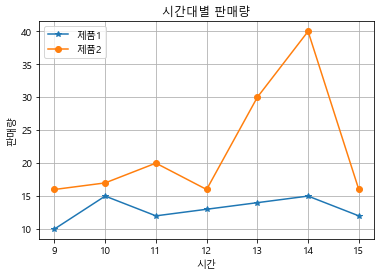

In [14]:
# 한글처리
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

product_plot = df.plot(grid=True, style=['-*', '-o'], 
                       title='시간대별 판매량')
product_plot.set_ylabel('판매량')
image_file = '../data/excel/fig_for_excel.png'
plt.savefig(image_file, dpi=400) # 그래프를 이미지파일로 저장
plt.show()

In [15]:
# 2) 엑셀
# a. Excelwriter 객체생성
excel_file = '../data/excel/data_image_to_excel.xlsx'
excel_writer = pd.ExcelWriter(excel_file,engine='xlsxwriter')

# b. DF의 데이터를 지정된 엑셀시트에 쓰기
df.to_excel(excel_writer, index=True, sheet_name='Sheet1')

# c. excelWriter객체에서 워크시트 (worksheet)객체 생성
worksheet = excel_writer.sheets['Sheet1']

# d. 워크시트에 차트가 들어갈 위치를 지정
worksheet.insert_image('D2',image_file,{'x_scale':0.7,'y_scale':0.7})
# e. worksheet.insert_image(1,3,image_file,{'x_scale':0.7,'y_scale':0.7})

# 엑셀파일에 저장
excel_writer.save()

In [17]:
# 3) 엑셀 - 차트 넣기

# a. Excelwriter 객체생성
excel_file = '../data/excel/data_chart_in_excel.xlsx'
excel_chart = pd.ExcelWriter(excel_file,engine='xlsxwriter')

# b. DF의 데이터를 지정된 엑셀시트에 쓰기
df.to_excel(excel_chart, index=True, sheet_name='Sheet1')

# c. excelWriter객체에서 workbook과 worksheet객체 생성
workbook = excel_chart.book
worksheet = excel_chart.sheets['Sheet1']

# d. 차트객체를 생성(원하는 차트의 종류를 지정)
chart = workbook.add_chart({'type':'line'})

# e. 차트생성을 위한 데이터값의 범위 지정
chart.add_series({'values':'Sheet1!$B$2:$B$8'})
chart.add_series({'values':'Sheet1!$C$2:$C$8'})

# f. 차트가 들어갈 위치 지정
worksheet.insert_chart('D2',chart)

# g. 파일저장
excel_chart.save()

In [20]:
# a. Excelwriter 객체생성
excel_file = '../data/excel/data_chart_in_excel1.xlsx'
excel_chart = pd.ExcelWriter(excel_file,engine='xlsxwriter')

# b. DF의 데이터를 지정된 엑셀시트에 쓰기
df.to_excel(excel_chart, index=True, sheet_name='Sheet1')

# c. excelWriter객체에서 workbook과 worksheet객체 생성
workbook = excel_chart.book
worksheet = excel_chart.sheets['Sheet1']

# d. 차트객체를 생성(원하는 차트의 종류를 지정)
chart = workbook.add_chart({'type':'line'})


# e-1 차트생성을 위한 데이터값의 범위 지정
chart.add_series({'values':'Sheet1!$B$2:$B$8','categories':'=Sheet1!$A$2:$A$8','name':'=Sheet1!$B$1'})
chart.add_series({'values':'Sheet1!$C$2:$C$8','categories':'=Sheet1!$A$2:$A$8','name':'=Sheet1!$C$1'})

# e-2 차트의 x,y축이름
chart.set_title({'name':'시간대별 판매량'})
chart.set_x_axis({'name':'시간'})
chart.set_y_axis({'name':'판매량'})

# f. 차트가 들어갈 위치 지정
worksheet.insert_chart('D2',chart)

# g. 파일저장
excel_chart.save()

#### 10. html파일 다루기


In [104]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=066570'
df = pd.read_html(url)

[            날짜       종가     전일비       시가       고가       저가        거래량
 0          NaN      NaN     NaN      NaN      NaN      NaN        NaN
 1   2020.04.02  49300.0  1200.0  49100.0  50000.0  48500.0  1066010.0
 2   2020.04.01  48100.0   100.0  48250.0  50800.0  47850.0  1298461.0
 3   2020.03.31  48200.0   300.0  49100.0  49500.0  47600.0  1106424.0
 4   2020.03.30  48500.0   900.0  48400.0  49200.0  47100.0   937027.0
 5   2020.03.27  49400.0   400.0  51300.0  51500.0  48000.0  1110394.0
 6          NaN      NaN     NaN      NaN      NaN      NaN        NaN
 7          NaN      NaN     NaN      NaN      NaN      NaN        NaN
 8          NaN      NaN     NaN      NaN      NaN      NaN        NaN
 9   2020.03.26  49000.0   500.0  49450.0  51300.0  48600.0  1377158.0
 10  2020.03.25  48500.0  4100.0  48400.0  48850.0  46800.0  1506779.0
 11  2020.03.24  44400.0  2550.0  42700.0  44450.0  42200.0  1316623.0
 12  2020.03.23  41850.0  3250.0  42350.0  42850.0  41600.0  1186795.0
 13  2

In [115]:
# read_html 실습 :
url = 'https://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13'
code_df = pd.read_html(url, header=0)[0]
code_df.head(2)

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
1,GS,78930,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시


In [116]:
code_df.종목코드 = code_df.종목코드.map('{:06d}'.format)
code_df.head(2)

# 회사명, 종목코드 -> 영문으로 변경
code_df = code_df[['회사명','종목코드']]
code_df = code_df.rename(columns={'회사명':'name', '종목코드':'code'})
code_df.head()

,name,code
0,DSR,155660
1,GS,078930
2,GS글로벌,001250
3,HDC현대산업개발,294870
4,LG이노텍,011070


In [117]:
# 함수생성 : 종목이름을 넣으면 code return
# 네이버금융에서 데이터를 가저오도록함

def get_url(item_name, code_df):
    # code_df.loc[name,code]를 query문으로 구성한 듯
    # code_df[code_df[name] == '회사명'].code.tostring
    
    # format -> '{}'.format() : 중괄호 안에 들어갈 개체를 지정
    # 코드를 문자열로 받는 이유
    # name, code로 데이터를 찾을 시 이 데이터는 시리즈 형식을 취하고 있고
    # index, code 데이터를 가지고 있음 이를 바로 url에 넣을 시 index값이 들어가
    # url+index code 형식의 series 객체가 생성되어 url를 뽑을 수 없게됨
    # 이를 to_string으로 변환한 뒤 index=Fasle을 하여 인덱스를 출력하지 않는 str값으로 변환
    # index와 거리를 두기위해 생성되는 빈칸을 strip으로 제거해서 url에 붙일 수 있게 정리한것

    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    code = code.strip()
    
    # format은 {}안에 문자가 있으면 그 문자를 지정하여 데이터를 넣을 수 있음
    url = 'https://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)
    print('{}'.format(url))
    return url

# 신라젠의 일자데이터 url가져오기
item_name= '신라젠'
url = get_url(item_name,code_df)
url

https://finance.naver.com/item/sise_day.nhn?code=215600


'https://finance.naver.com/item/sise_day.nhn?code=215600'

In [ ]:
# 1~20 페이지까지의 데이터를 가저옴
# 페이지는 데이터 프레임으로 구성되어 있음으로 이를 저장할 빈 데이터프레임을 만듬
df = pd.DataFrame()

for page in range(1,21):
    # url은 위에서 문자열을 넣으면 자동으로 code까지 호출되는 url
    # page는 range로 넣음
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    # print(pg_url)
    # header = 0 가져온 table의 첫 행을 DataFrame의 컬럼으로 설정
    # [0] 지정한 URL의 첫번째 table을 DataFrame으로 반환
    # header 은 헤더값을 지정, [0] 은 리스트를 df로 변환
    # [0]이 없으면 append가 안될듯
    df = df.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
    
# 결측값 행 제거
df = df.dropna() # 기본값 how='any'
df.tail()

In [155]:
# 함수생성 : 종목이름을 넣으면 code return
# 네이버금융에서 데이터를 가저오도록함

def get_url(item_name, code_df):
    # 
    # code_df[code_df[name] == '회사명'].code.tostring
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index=False)
    code = code.strip()
    url = 'https://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)
    print('{}'.format(url))
    return url

# 신라젠의 일자데이터 url가져오기
item_name= input('회사명: ')
url = get_url(item_name,code_df)
url

# 1~20 페이지까지의 데이터를 가저옴
df = pd.DataFrame()
for page in range(1,21):
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    # print(pg_url)
    df = df.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
    
# 결측값 행 제거
df = df.dropna() # 기본값 how='any'
df.tail()

회사명: 삼성전자
https://finance.naver.com/item/sise_day.nhn?code=005930


,날짜,종가,전일비,시가,고가,저가,거래량
294,2019.06.20,45500.0,150.0,44850.0,45500.0,44850.0,7147785.0
295,2019.06.19,45350.0,1000.0,45450.0,45450.0,45000.0,10417690.0
296,2019.06.18,44350.0,450.0,43750.0,44500.0,43650.0,7994928.0
297,2019.06.17,43900.0,100.0,43750.0,44050.0,43400.0,11890424.0
298,2019.06.14,44000.0,250.0,43750.0,44150.0,43300.0,9322873.0


In [58]:
# 한글을 영문으로 변환
df = df.rename(columns={'날짜':'date', '종가':'close', '전일비': 'diff',
                        '시가':'open','고가':'high','저가':'low','거래량':'volumn'})
df.head()
# 'date'의 타입을 data형으로 변환
df['date'] = pd.to_datetime(df['date'])

df = df.sort_values(by=['date'], ascending= True)
df

,date,close,diff,open,high,low,volumn
298,2019-06-14,56800.0,900.0,56100.0,59400.0,55800.0,985343.0
297,2019-06-17,56700.0,100.0,57500.0,58500.0,56600.0,421203.0
296,2019-06-18,55400.0,1300.0,57000.0,57400.0,55000.0,495082.0
295,2019-06-19,56000.0,600.0,55900.0,56400.0,55200.0,331231.0
294,2019-06-20,57700.0,1700.0,56100.0,57900.0,56100.0,487092.0
...,...,...,...,...,...,...,...
5,2020-03-27,12500.0,100.0,13100.0,15100.0,10950.0,31430784.0
4,2020-03-30,13600.0,1100.0,13400.0,14150.0,12550.0,12933017.0
3,2020-03-31,13250.0,350.0,14100.0,14150.0,12800.0,7033730.0
2,2020-04-01,13100.0,150.0,13300.0,15050.0,12800.0,15100838.0


In [ ]:
# 시각화
# https://dailyheumsi.tistory.com/118

import plotly.offline as offline
import plotly.graph_objs as go

In [ ]:
offline.init_notebook_mode(connected=True)
trace = go.Scatter(x=df.date, y=df.close,name = item_name)
data = [trace]

In [65]:
layout = dict(
            title='{}의 종가(close) Time Series'.format(item_name),
            xaxis=dict(
                rangeselector=dict(
                    buttons=list([
                        dict(count=1,
                             label='1m',
                             step='month',
                             stepmode='backward'),
                        dict(count=3,
                             label='3m',
                             step='month',
                             stepmode='backward'),
                        dict(count=6,
                             label='6m',
                             step='month',
                             stepmode='backward'),
                        dict(step='all')
                    ])
                ),
                rangeslider=dict(),
                type='date'
            )
        )

In [ ]:
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)